# MA124 Maths by Computer: Assignment 4

Student number: 2106983

---


In this notebook, we will take inspiration from the research article on the demand of bike sharing in South Korea using data mining (cited fully below). The aim of the article is to use various analytical techniques to train a machine that will be able to predict the demand of rental bikes given many factors (weather, hour, etc). Out of the these techniques we will be focusing on the linear regression model and in a similar fashion to the authors, analysing the data of a modified version of the original dataset to come to some conclusions.

[1] Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. [web link](https://doi.org/10.1016/j.comcom.2020.02.007).

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

---

## Read the data 

Read the SeoulBikeData_mod.csv file into a pandas Dataframe and describe the Dataframe. One sees that there are 4416 examples of Rented Bike Counts.

In [2]:
# read the SeoulBikeData_mod.csv file to DataFrame bikes
bikes = pd.read_csv("SeoulBikeData_mod.csv") 

In [3]:
# Access useful information about the data set using the describe function
bikes.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
count,4416.000000,4416.00000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000
mean,704.591259,11.50000,13.203986,59.257246,1.653193,1398.641304,4.723958,0.560181,0.139312,0.070879,5.956522
std,637.407244,6.92297,11.529724,20.162981,0.976361,621.560536,12.671445,0.860496,1.145271,0.437416,3.407262
min,0.000000,0.00000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,189.000000,5.75000,4.500000,44.000000,0.900000,853.000000,-3.500000,0.000000,0.000000,0.000000,3.000000
50%,542.000000,11.50000,14.300000,58.000000,1.500000,1621.000000,6.400000,0.010000,0.000000,0.000000,5.000000
75%,1047.000000,17.25000,22.200000,75.000000,2.200000,1999.000000,14.900000,0.910000,0.000000,0.000000,9.000000
max,3298.000000,23.00000,38.000000,98.000000,6.700000,2000.000000,26.800000,3.520000,35.000000,8.800000,11.000000


Above: A table of useful information about our data set, including mean, maxes and quartiles for all our variables.

---

### Visualise the data

The first figure below shows a histogram of the Rented Bike Count. The plot is similar to that of Fig. 3 of Ref. [1]. 

The next two figures are violin plots showing the Rented Bike Count frequency each month and then each hour. One sees fewer rented bicycles in Jan and in the early hours of the morning.

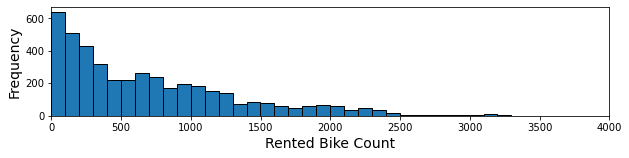

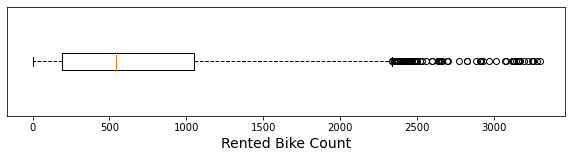

In [4]:
# Plot histogram of Rented Bike Count and modify figure size to look similar to article
plt.figure(figsize=(10,2))
plt.hist(bikes['Rented Bike Count'],edgecolor='k',bins=33)
plt.xlim(0,4000)
plt.xlabel('Rented Bike Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# print for gap between
print()

# Plot boxplot of Rented Bike Count and modify figure size to look similar to article
plt.figure(figsize=(10,2))
plt.boxplot(bikes['Rented Bike Count'], vert=False, whiskerprops = dict(linestyle='--'))
plt.tick_params(labelleft=False,left=False)
plt.xlabel('Rented Bike Count', fontsize=14)
plt.show()

##### Rented bike count distribution. Top: Histogram, Bottom: Boxplot.

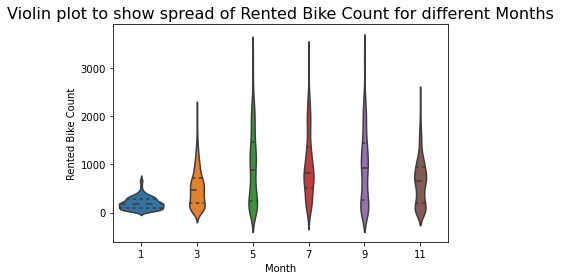

In [5]:
# Plot violin plot for Rented Bike Count for different Months (denoted by a value)
sns.violinplot(y='Rented Bike Count', x='Month', data=bikes, inner='quartile')
plt.title('Violin plot to show spread of Rented Bike Count for different Months', fontsize=16)
plt.show()

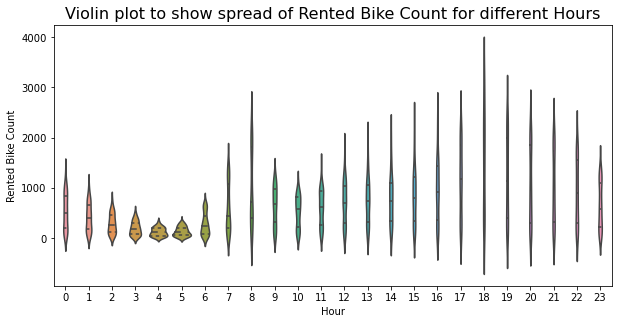

In [19]:
# # Plot violin plot for Rented Bike Count for different Hours
plt.figure(figsize=(10,4.8))
sns.violinplot(y='Rented Bike Count', x='Hour', data=bikes, inner='quartile')
plt.title('Violin plot to show spread of Rented Bike Count for different Hours', fontsize=16)
plt.show()

### Preparing the data

First we extract the 'Rented Bike Count' column as a target vector `y`. Then we construct the design matrix `X` as all columns except the 'Rented Bike Count'. From these we perform a train-test split in which 25% of the samples are saved for testing. This is the same number as was used in Ref. [1].

In [ ]:
# Create new dataframe X and a series y
X = bikes.drop(['Rented Bike Count'], axis=1)
y = bikes['Rented Bike Count']
# There are the design matrix and target respectively

# Perform test-train split on our design matrix and target, using test size found from article
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2189/(2189+6571))

### Perform machine learning

We set up a linear regression learning. 

In [ ]:
# And then create and train a Linear Regression model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Use the trained model to obtain y_pred1, the prediction on the test data X_test, using the linear regression model.
y_pred1 = regr.predict(X_test)

# Compute the residual (resid1) from the vector y_pred
resid1 = y_test - y_pred1

### Quantitative test

We test the performance of the machine learning by computing and reporting quantitative measures of the accuracy. We find that the values for the R squared (R2), root mean squared error (RMSE), mean absolute error (MAE) and coefficient of variation (CV) all agree reasonably well with the values reported in the right half of table 4 of Ref. [1].

In [ ]:
# Compute and print different perfomance measures, note L indicates the linear regression
# Compute and print Rsquared (R2)
r2L = r2_score(y_test, y_pred1)
print("The Rsquared is",r2L)

# Compute and print Root Mean Squared Error (RMSE)
RMSEL = np.sqrt(np.mean(resid1**2))
print("The RMSE is", RMSEL)

# Compute and print Mean Absolute Error (MAE)
MAEL = np.mean(np.abs(resid1))
print("The MAE is", MAEL)

# Compute and print Coefficient of Variation (CV)
CVL = 100 * np.sqrt(np.mean(resid1**2))/np.mean(y_test)
print("The CV is", round(CVL),"%")

The Rsquared is 0.4436034409874986
The RMSE is 478.17551971489445
The MAE is 352.7320146518179
The CV is 69 %


The values reported in the article are 0.55, 427.71, 322.32 and 61.03% respectively - so for each performance measure, our modified dataset has similar values.

### Plots

Next we show plots summarising the accuracy. The first plot shows a histogram of rented bike count both for the original test data (true) and for the predictions (predicted). It is clear that the predictions do not agree well with the true histogram.

Next is the residual as a function of the Rented Bike Count. Colours indicate the hour. One sees that the residuals are smaller in the early morning hours (e.g. midnight to 5am) compare with other hours, especially around commuting hours 8am and 8pm. 

The final two plot show the residual as a function of month and rain fall. One sees directly that the residual is highest in months 5, 7 and 9 (May and July and September) compared with month 1 (Jan). One also sees that the residual is higher if there is no rain but relatively low when there is rain.

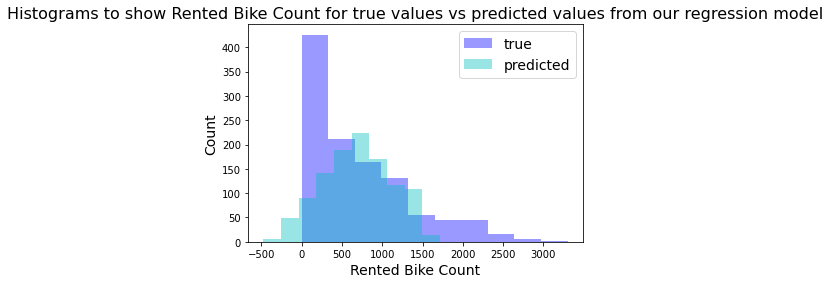

In [22]:
plt.hist(y_test, label='true', color='b',alpha=0.4)
plt.hist(y_pred1, label='predicted',color='c',alpha=0.4)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Rented Bike Count', fontsize=14)
plt.title('Histograms to show Rented Bike Count for true values vs predicted values from our regression model', fontsize=16)
plt.legend(fontsize=14)
plt.show()

The figure above is essentially a visual representation of how well our linear regression model predicts the real world data. As you can see in the bulk of the data the true and predicted match up quite closely, however there are signicant regions, namely right of 1500 of the peak around 200, where the model doesn't match the true data very well.

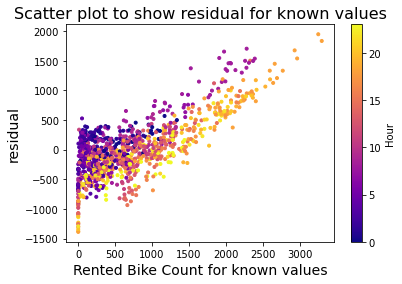

In [ ]:
plt.scatter(y_test,resid1,c=X_test['Hour'],cmap='plasma',marker='.')
plt.ylabel('residual', fontsize=14)
plt.xlabel('Rented Bike Count for known values', fontsize=14)
plt.title('Scatter plot to show residual for known values', fontsize=16)
plt.colorbar(label='Hour')
plt.show()

This scatter plot demonstrates how the residual (error) varies as the rented bike count increases. It is clear to see that has count increases (right along the x axis), the error gets larger (further away from x axis). Also, there is quite a large range of error at 0, before the count starts increasing.

There are lighter colours closer to the x axis as the count increases suggesting that at hours later in the day the model is more accurate.

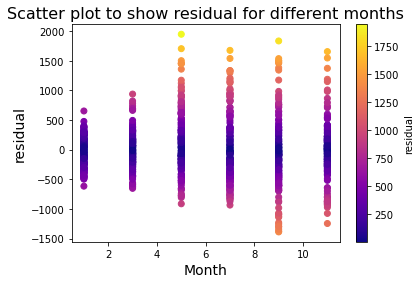

In [13]:
plt.scatter(X_test["Month"], resid1,c=np.abs(resid1),cmap='plasma')
plt.ylabel('residual', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.title('Scatter plot to show residual for different months', fontsize=16)
plt.colorbar(label='residual')
plt.show()

This scatter plot has discrete values along the x axis meaning the analysis is more straight forward. Generally, the range of errors is similar across each month. Month 1 (January) has the smallest range in error and then months 5 and 9 (May and September) have the largest range perhaps due to the more irratic habits of people during these months - occurences or renting a bike are more random than decided by pre-determined factors.

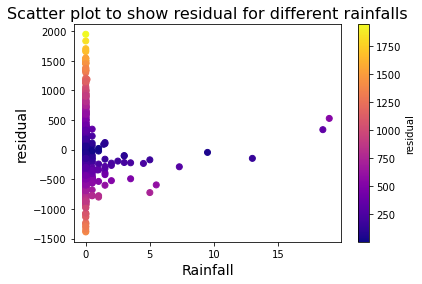

In [14]:
plt.scatter(X_test["Rainfall(mm)"], resid1,c=np.abs(resid1),cmap='plasma')
plt.ylabel('residual', fontsize=14)
plt.xlabel('Rainfall', fontsize=14)
plt.title('Scatter plot to show residual for different rainfalls', fontsize=16)
plt.colorbar(label='residual')
plt.show()

This scatter plot has has the majority of data at the x=0 line and he error is very wide in this region, largely because for the data points where there was zero fainfall, there will have been many other factors contributing that lead to different predictions. 

----

## Decision Tree

Here we consider a the scikit-learn decision tree regressor. We use the same train-test split from above and train the regressor with a max depth `max_depth=8`. 

### Here we will introduce and code a new regression model.

In [15]:
# Fit new decision tree regression model
regr = DecisionTreeRegressor(max_depth=8)
regr.fit(X_train, y_train)

# Predict
y_pred2 = regr.predict(X_test)

In [16]:
# Compute the residual (resid) from the vector y_pred
resid2 = y_test - y_pred2

# Compute and print different perfomance measures, note T indicates the Decision Tree regression
# Compute and print Rsquared (R2)
r2T = r2_score(y_test, y_pred2)
print("The Rsquared is",r2T)

# Compute and print Root Mean Squared Error (RMSE)
RMSET = np.sqrt(np.mean(resid2**2))
print("The RMSE is", RMSET)

# Compute and print Mean Absolute Error (MAE)
MAET = np.mean(np.abs(resid2))
print("The MAE is", MAET)

# Compute and print Coefficient of Variation (CV)
CVT = 100 * np.sqrt(np.mean(resid2**2))/np.mean(y_test)
print("The CV is", round(CVT),"%")

The Rsquared is 0.6326327643632031
The RMSE is 388.54858434789475
The MAE is 235.17695264518244
The CV is 56 %


In [17]:
# Recall and print values of performance measures for the different models
print("The Rsquared for the linear model is",r2L,"whereas for the decision tree model it is",r2T)
print("The RMSE is for the linear model is", RMSEL,"whereas for the decision tree model it is",RMSET)
print("The MAE is for the linear model is", MAEL,"whereas for the decision tree model it is",MAET)
print("The CV is for the linear model is", round(CVL),"%","whereas for the decision tree model it is",round(CVT),"%")

The Rsquared for the linear model is 0.4436034409874986 whereas for the decision tree model it is 0.6326327643632031
The RMSE is for the linear model is 478.17551971489445 whereas for the decision tree model it is 388.54858434789475
The MAE is for the linear model is 352.7320146518179 whereas for the decision tree model it is 235.17695264518244
The CV is for the linear model is 69 % whereas for the decision tree model it is 56 %


It is clear to see that the values where lower is better (RMSE, MAE, CV) the decision tree model has the lower values and is therefore more accurately predicting the true values. This is further seen in the Rsquared value where larger is better and the decision tree model has the larger value.

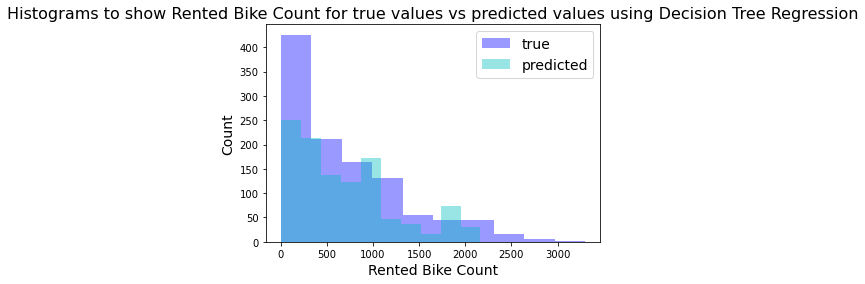

In [18]:
# Plot the results
plt.hist(y_test,label='true',color='b',alpha=0.4)
plt.hist(y_pred2,label='predicted',color='c',alpha=0.4)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Rented Bike Count', fontsize=14)
plt.title("Histograms to show Rented Bike Count for true values vs predicted values using Decision Tree Regression",fontsize=16)
plt.legend(fontsize=14)
plt.show()

Similar to the the first histogram plotted with the linear regression, this plot is a visual representation of how well our model predicts the true values. It is clear to see that the decision tree is a better predictor as more of the data overlaps than in the linear model histogram. Again, the decision tree falls short at the outliers with larger values and the peak of the smaller values, but not as much as the linear regression model did.

This plot agrees with our conclusions from the values of the performance measures where we said the decision tree model is a better predictor.

## Summary:

To summarise, using a very similar model and a modified but similar data set to the ones used in the article we have produced a shorter less conclusive report into the same investigation. Our findings were fairly close to the ones found in the article for this model, but we cannot firmly conclude any findings unlike the articlecwe were inspired by. This is because the article used many more models, which use far more sophisticated analytical techniques to come to firmer conclusions. We began to see this when investigating using a decision tree regression model that yielded better findings, and this notebook is a good demonstration of the basics of data analysis and a shows a clear pathway into trickier and more useful things.

## Conclusions

We have performed machine learning on rented bike count data. We have reproduced some key results from the study of Ref. [1]. In particular, for the linear regression we find values for the R squared (R2), Root Mean Squared Error (RMSE), the Mean Absolute Error (MAE), and Coefficient of Variation (CV) similar to those reported in Ref. [1]. We obtain the same behaviour of the residual error rented bike count as did Ref. [1]. We have directly compared histograms of true rented bike counts with predicted values for both linear regression and a decision tree regressor. The decision tree regressor performs considerably better than the linear regressor.

---